In [21]:
import numpy as np
import os
import time
import matplotlib.pyplot as plt


In [ ]:

base = "/media/zx/zx-data/RawData/exp02/"
for dir in os.listdir(base):
    if ("meta.log" == dir):
        continue
    dirname = base+dir
    #print(dirname)
    image = np.load(base+dir+"/"+os.listdir(dirname)[2])
    plt.imshow(image)
    plt.title(dir)
    plt.show()
    # image = np.load("RawData/exp01/"+dir+"/"+os.listdir(dirname)[1])
    # print(image.shape)
    # plt.imshow(image)
    # plt.title(dir)
    # plt.show()
    print("=============================================================")
    print(dirname)

In [ ]:
base = "/media/zx/zx-data/RawData/exp06/depth_map/"
base += "senxor_m08/"
for image_name in os.listdir(base):
    image_path = base+image_name
    #print(dirname)
    image = np.load(image_path)
    plt.imshow(image)
    plt.title(dir)
    plt.show()
    print("=============================================================")
    print(dirname)

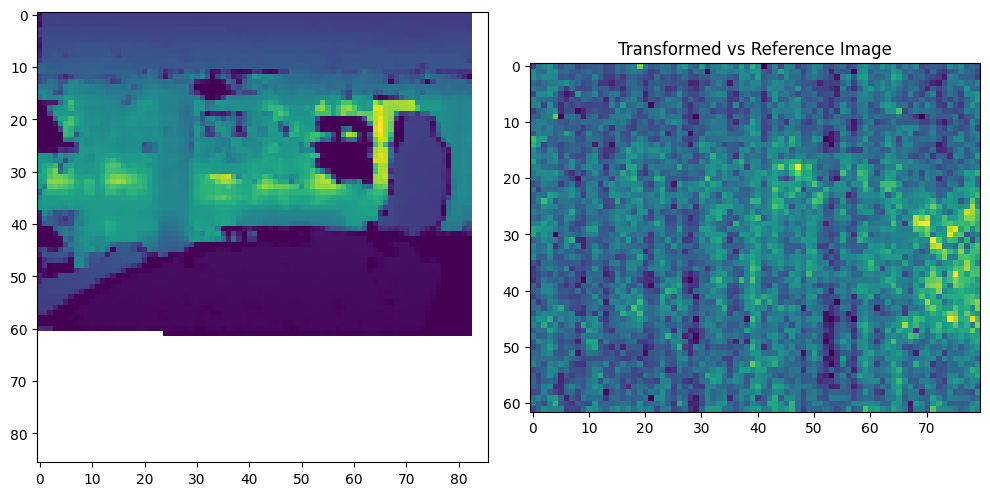

In [28]:
# TODO: visualize the transformed depth and the thermal image
# step1: load the transformed depth and thermal image
# step2: visualize them on two axis in a single pyplot
# step3: show the red "+" mark on each image's corresponding positions

#step 0: some params
data_folder = "exp06" # the folder where all data from one collection event is stored
sensor_name = "senxor_m08" # the sensor name of the thermal camera
image_index = 0 # the index (in the sequence of images collected in the collection event) of the image to visualize
# sensor name can also be: MLX, seek_thermal, senxor_m08, senxor_m08_1


#step1: load the transformed depth and thermal image==================================================================
# we know the directory of transformed image is: /media/zx/zx-data/RawData/<exp06>/depth_map/<senxor_name>/
# we know the directory of reference image is: /media/zx/zx-data/RawData/<exp06>/<sensor_name>/
transformed_image_dir = f"/media/zx/zx-data/RawData/{data_folder}/depth_map/{sensor_name}/"
reference_image_dir = f"/media/zx/zx-data/RawData/{data_folder}/{sensor_name}/"

#format the names of the image files
transformed_file_name = transformed_image_dir + os.listdir(transformed_image_dir)[image_index]
reference_file_name = reference_image_dir + os.listdir(reference_image_dir)[image_index]

#load the images
transformed_image = np.load(transformed_file_name)
reference_image = np.load(reference_file_name)

# plt.imshow(transformed_image)
# plt.show()

#step2: visualize them on two axis in a single pyplot==================================================================
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))
ax1.imshow(transformed_image)
ax2.imshow(reference_image)

#step3: show the red "+" mark on each image's corresponding positions====================================================
cursor1, = ax1.plot([], [], 'r+')
cursor2, = ax2.plot([], [], 'r+')
fig.canvas.mpl_connect("motion_notify_event", lambda event: cursor1.set_data(event.xdata, event.ydata) if event.inaxes == ax2 else cursor2.set_data(event.xdata, event.ydata))
plt.tight_layout()
plt.title("Transformed vs Reference Image")
plt.show()


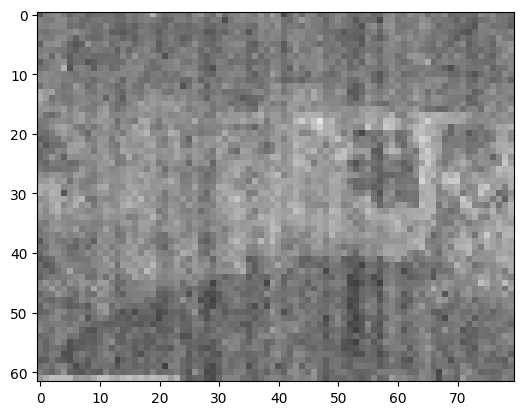

In [27]:
# TODO: show the overlapped depth and thermal image
plt.imshow(transformed_image, cmap='gray', alpha=0.5)
plt.imshow(reference_image, cmap='gray', alpha=0.5)